In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv('netflix_titles.csv', encoding='latin1')
df=df[df.columns[:12]]
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Content Type Distribution
How is content distributed between movies and TV shows?

In [3]:
df.type.value_counts()

Movie      6132
TV Show    2677
Name: type, dtype: int64

## Release Year Analysis
What trends can be observed in the release years of content added to Netflix? Has there been an increase in recent content over the years?

Text(0, 0.5, 'Number of Releases')

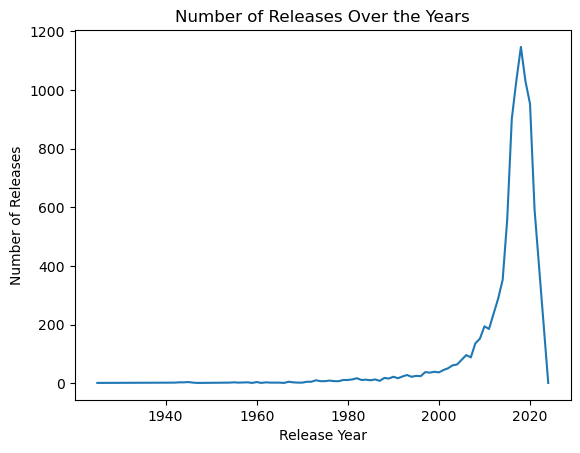

In [4]:
df.release_year.value_counts().sort_index().plot(kind='line')
plt.title("Number of Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Releases")

It looks like a majority of movies and TV shows that are on netflix, have been released mainly after 2000, with a peak of nearly 1200 number of releases in 2020.

## Geographic Distribution
Which countries produce the most content available on Netflix? Are there noticeable differences in the type of content (movies vs. TV shows)?

Text(0, 0.5, 'Country')

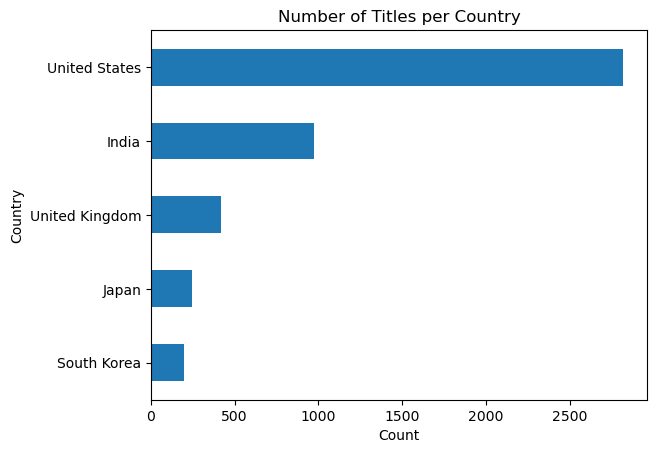

In [5]:
ax = df.country.value_counts().nlargest(5).sort_values(ascending=True).plot(kind='barh')
bars = ax.patches

plt.title("Number of Titles per Country")
plt.xlabel("Count")
plt.ylabel('Country')

Text(0, 0.5, 'Country')

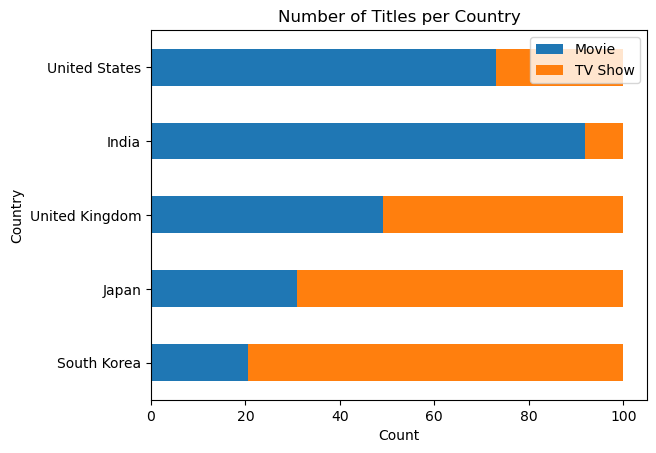

In [6]:
index = []
row = []
for c in ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea'][::-1]:
  cnt = df[df.country==c].type.value_counts()  
  total = cnt['Movie'] + cnt['TV Show']
  index.append(c)
  row.append([cnt['Movie']/total*100, cnt['TV Show']/total*100,] )
cnt = pd.DataFrame(row, columns=['Movie', 'TV Show'], index=index)
cnt.plot(kind='barh', stacked=True)

plt.title("Number of Titles per Country")
plt.xlabel("Count")
plt.ylabel('Country')

It shows that United States produces the most amount of Movies on Netflix, with India second behind with less than half of the movies produced by America.

It also shows that the United States and India produce mostly movies, where countries like the United Kingdom, Japan, and South Korea mainly produce TV Shows.

## Rating Analysis
What is the distribution of content ratings on Netflix? 

Text(0.5, 0, 'Rating Category')

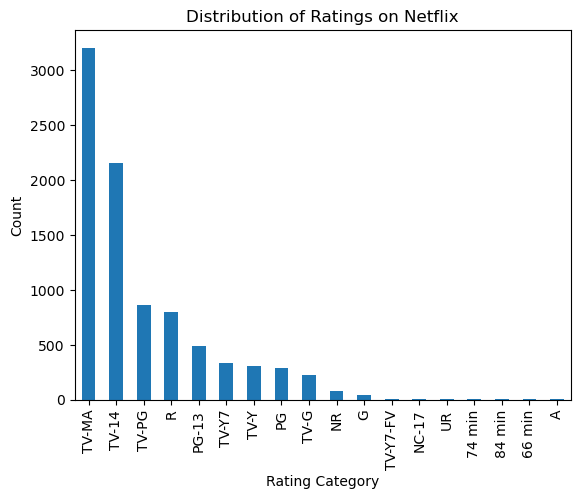

In [7]:
df.rating.value_counts().plot(kind='bar')
plt.title('Distribution of Ratings on Netflix')
plt.ylabel('Count')
plt.xlabel('Rating Category')

It looks like the most common rating for TV shows is rated for Mature audiences only and the most common rating for Movies are rated R.

## Duration Insights
What are the common durations for movies and TV shows?

Text(0, 0.5, 'Count')

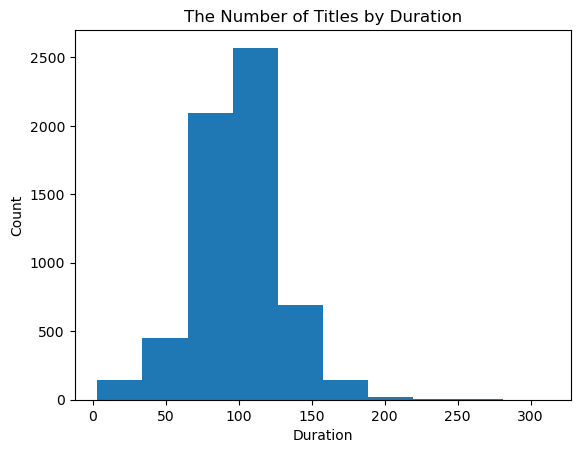

In [8]:
movie = df[df.type=='Movie'].copy()
movie.duration = movie.duration.str.split(expand=True)[0]
movie.duration = pd.to_numeric(movie.duration)
movie.duration.plot(kind='hist')

plt.title("The Number of Titles by Duration")
plt.xlabel("Duration")
plt.ylabel("Count")

The most common duration for movies on Netflix seem to be 120 minutes, or about 2 hours. There seem to be some short films that are less than 50 minutes and a few movies that are longer than 120 minutes.

## Genre Insights
What are the most common movie genres?

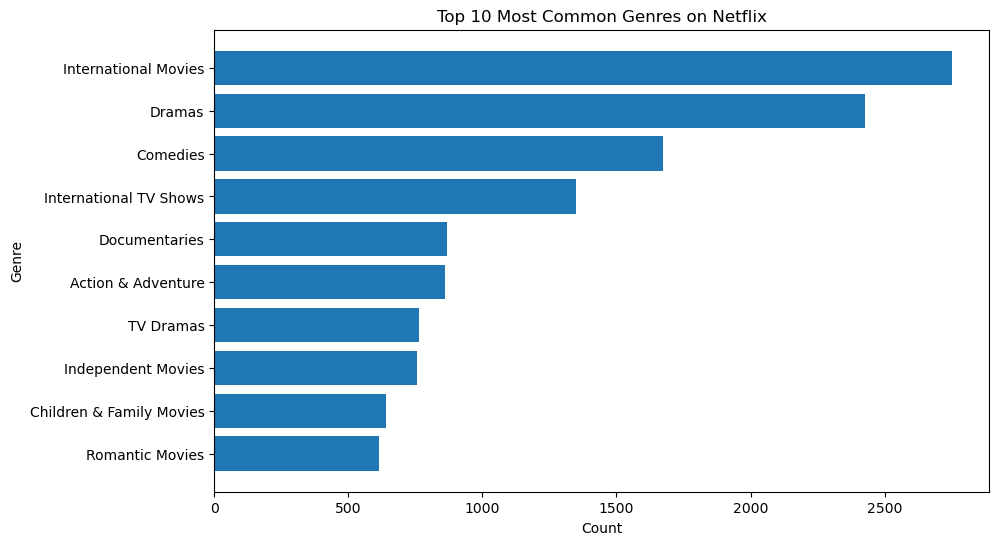

In [9]:
genres = df['listed_in'].apply(lambda x: x.split(', '))
genre_counts = Counter(genre for sublist in genres for genre in sublist)

# Selecting the top 10 most common genres
top_genres = dict(genre_counts.most_common(10))

plt.figure(figsize=(10, 6))
plt.barh(list(top_genres.keys()), list(top_genres.values()))
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  
plt.show()

The most common movie genre is International movie with over 2500 titles.

## Director Focus
Who are the most frequent directors on Netflix for both movies and TV shows?

In [10]:
director = df.director.value_counts().nlargest(10).to_frame().reset_index()
director

,index,director
0,Rajiv Chilaka,19
1,"RaÃºl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Jay Chapman,12
9,Steven Spielberg,11


The most frequent director on Netflix is Rajiv Chilaka with 19 directed Netflix titles. This also ties in with the previous question of the most common genres with international movies taking the lead.